# Import Libraries 

In [1]:
import psutil,time
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor


# System Monitoring

## Ram

In [2]:
def get_ram_usage():
    return psutil.virtual_memory().percent

## CPU

In [3]:
def get_cpu_usage():
    return psutil._percent(interval=1)

## Processes

In [4]:
def get_process_data():
    process_data={}
    for proc in psutil.process_iter(['pid', 'name', 'ram_percent', 'memory_percent', 'status', 'create_time']):
        process_data[proc.info['pid']] = proc.info
    return process_data

## Get the data

In [5]:
for i in range(10):
    print(f"CPU Usage: {get_ram_usage()}%")
    print(f"RAM Usage: {get_ram_usage()}%")
    print(get_process_data())
    time.sleep(1)

CPU Usage: 7.0%
RAM Usage: 76.7%
{1: {'pid': 1, 'create_time': 1719986555.83, 'cpu_percent': 0.0, 'memory_percent': 0.2888550514222697, 'name': 'systemd', 'status': 'sleeping'}, 2: {'pid': 2, 'create_time': 1719986555.92, 'cpu_percent': 0.0, 'memory_percent': 0.03531012712657517, 'name': 'init-systemd(Ub', 'status': 'sleeping'}, 7: {'pid': 7, 'create_time': 1719986556.91, 'cpu_percent': 0.0, 'memory_percent': 0.003439955078233684, 'name': 'init', 'status': 'sleeping'}, 51: {'pid': 51, 'create_time': 1719986558.05, 'cpu_percent': 0.0, 'memory_percent': 0.33994850184897585, 'name': 'systemd-journald', 'status': 'sleeping'}, 74: {'pid': 74, 'create_time': 1719986558.48, 'cpu_percent': 0.0, 'memory_percent': 0.14528751448069324, 'name': 'systemd-udevd', 'status': 'sleeping'}, 90: {'pid': 90, 'create_time': 1719986558.64, 'cpu_percent': 0.0, 'memory_percent': 0.004654056870551455, 'name': 'snapfuse', 'status': 'sleeping'}, 92: {'pid': 92, 'create_time': 1719986558.66, 'cpu_percent': 0.0, 'm

## save the data

In [6]:
import json

In [20]:

for i in range(1000):
    data={
        "cpu": get_cpu_usage(),
        "ram": get_ram_usage(),
        "processes": get_process_data()
    }
    with open("data.json", "a") as f:
        f.write(json.dumps(data))
        f.write("\n")
    time.sleep(3)

It will take approximately 10.0 minutes to get 10000 samples.
Time per sample: 0.06 seconds


KeyboardInterrupt: 

In [14]:
cpu_data=[]
ram_data=[]
with open('data.json', 'r') as file:
    for line in file:
        data=json.loads(line)
        cpu_data.append(data['cpu'])
        ram_data.append(data['ram'])
print(cpu_data)
print(ram_data)

[2.7, 1.7, 59.9, 3.7, 33.7, 0.5, 5.7, 5.3, 5.8, 68.5, 38.7, 62.2, 1.8, 1.5, 37.7, 88.8, 83.9, 83.6, 94.6, 92.6, 62.7, 54.6, 68.3, 52.7, 56.0, 69.7, 75.4, 97.0, 65.9, 57.9, 98.2, 89.0, 80.4, 83.2, 99.7, 62.6, 56.4, 56.4, 97.0, 60.5, 62.3, 93.6, 19.7, 91.5, 87.1, 66.1, 0.7, 42.1, 0.8, 9.0, 95.2, 62.9, 37.3, 52.1, 63.6, 40.3, 39.8, 52.4, 26.3, 8.1, 43.9, 56.8, 61.2, 70.4, 71.3, 66.8, 55.9, 65.0, 53.6, 46.2, 57.8, 73.1, 36.5, 25.6, 92.5, 62.7, 40.0, 39.9, 27.6, 11.8, 27.8, 28.4, 16.0, 67.5, 57.8, 59.3, 55.6, 61.2, 49.0, 49.2, 26.8, 52.9, 56.9, 12.2, 4.2, 32.4, 9.0, 6.2, 28.4, 19.9, 16.5, 65.2, 48.1, 15.4, 10.8, 12.2, 8.2, 4.0, 2.5, 15.4, 40.1, 24.4, 62.0, 13.2, 17.9, 20.8, 29.0, 10.6, 29.9, 59.9, 58.1, 49.2, 58.3, 65.8, 58.5, 61.1, 64.4, 38.3, 39.2, 39.0, 9.5, 41.0, 15.7, 39.4, 15.8, 8.1, 39.4, 68.4, 47.1, 41.7, 64.5, 49.5, 62.2, 56.8, 60.7, 59.1, 62.9, 60.3, 68.4, 40.7, 68.6, 54.1, 51.5, 37.4, 33.2, 36.3, 36.9, 37.0, 38.2, 32.1, 33.4, 33.0, 32.6, 43.5, 38.7, 66.8, 34.6, 34.2, 41.0, 50.6, 

# Plot CPU and RAM

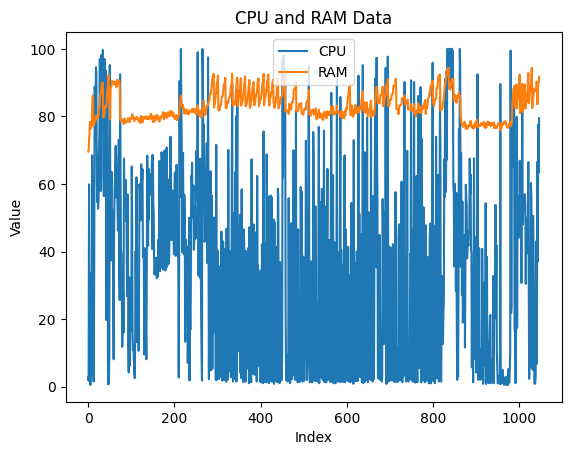

In [4]:

fig, ax = plt.subplots()
ax.plot(cpu_data, label='CPU')
ax.plot(ram_data, label='RAM')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('CPU and RAM Data')
ax.legend()
plt.show()


CPU Mean: 33.487010506208215
CPU Std: 28.082876109908582


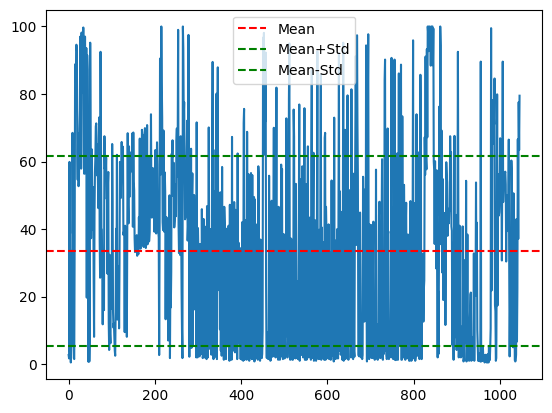

In [5]:
# plot std of cpu
cpu_data=np.array(cpu_data)
cpu_std=cpu_data.std()
cpu_mean=cpu_data.mean()
print(f"CPU Mean: {cpu_mean}")
print(f"CPU Std: {cpu_std}")
plt.plot(cpu_data)
plt.axhline(cpu_mean, color='r', linestyle='--', label='Mean')
plt.axhline(cpu_mean+cpu_std, color='g', linestyle='--', label='Mean+Std')
plt.axhline(cpu_mean-cpu_std, color='g', linestyle='--', label='Mean-Std')
plt.legend()
plt.show()

RAM Mean: 83.06867239732568
RAM Std: 4.151011942609996


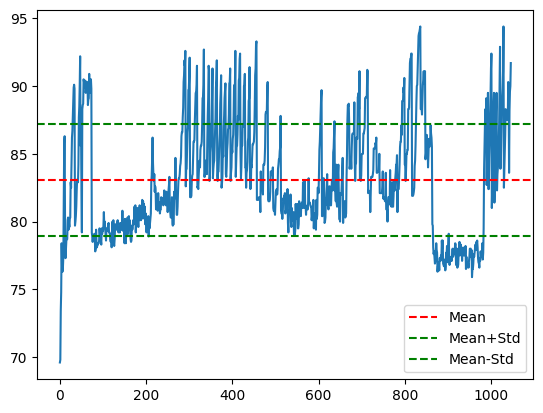

In [24]:
# plot ram std
ram_data=np.array(ram_data)
ram_std=ram_data.std()
ram_mean=ram_data.mean()
print(f"RAM Mean: {ram_mean}")
print(f"RAM Std: {ram_std}")
plt.plot(ram_data)
plt.axhline(ram_mean, color='r', linestyle='--', label='Mean')
plt.axhline(ram_mean+ram_std, color='g', linestyle='--', label='Mean+Std')
plt.axhline(ram_mean-ram_std, color='g', linestyle='--', label='Mean-Std')
plt.legend()
plt.show()

# Z score 

In [49]:
def zscore_anomalies(data, threshold=2):
    z_scores = np.abs(stats.zscore(data))
    anomalies = np.where(z_scores > threshold)[0]
    return anomalies

In [15]:

process = []

with open('data.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        
        process.append(data['processes'])

cpu_data = np.array(cpu_data)
ram_data = np.array(ram_data)

In [50]:
cpu_anomalies = zscore_anomalies(cpu_data)
ram_anomalies = zscore_anomalies(ram_data)

reported_processes_ram = set()
reported_processes_cpu = set()

def check_and_report_anomaly(index, anomaly_type, reported_set):
    x = []
    process_keys = list(process[index].keys())
    for j in process_keys:
        if anomaly_type == 'RAM':
            x.append(process[index][j]['memory_percent'])
        elif anomaly_type == 'CPU':
            x.append(process[index][j]['cpu_percent'])
    max_index = np.argmax(np.array(x))
    max_process_key = process_keys[max_index]
   
    if max_process_key not in reported_set:
        print(f"{anomaly_type} Anomaly: {process[index][max_process_key]}")
        reported_set.add(max_process_key)

# Report anomalies
for i in ram_anomalies:
    check_and_report_anomaly(i, 'RAM', reported_processes_ram)

for i in cpu_anomalies:
    check_and_report_anomaly(i, 'CPU', reported_processes_cpu)

RAM Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 6.9, 'memory_percent': 19.117752697582418, 'name': 'node', 'status': 'sleeping'}
RAM Anomaly: {'pid': 947, 'create_time': 1719986666.42, 'cpu_percent': 48.6, 'memory_percent': 29.89209670320776, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 208.3, 'memory_percent': 21.68932146886082, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 947, 'create_time': 1719986666.42, 'cpu_percent': 161.8, 'memory_percent': 31.72539040960759, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 1150, 'create_time': 1719986702.79, 'cpu_percent': 143.5, 'memory_percent': 9.170616713122923, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 16136, 'create_time': 1719990141.1, 'cpu_percent': 88.0, 'memory_percent': 1.9121091477511294, 'name': 'wakatime-cli-linux-amd64', 'status': 'sleeping'}


CPU Anomaly: {'pid': 27563, 'create_time': 1719992624.03, 'cpu_percent': 73.3, 'memory_percent': 6.361488691147681, 'name': 'wakatime-cli-linux-amd64', 'status': 'sleeping'}


CPU Mean: 33.487010506208215
CPU Std: 28.082876109908582


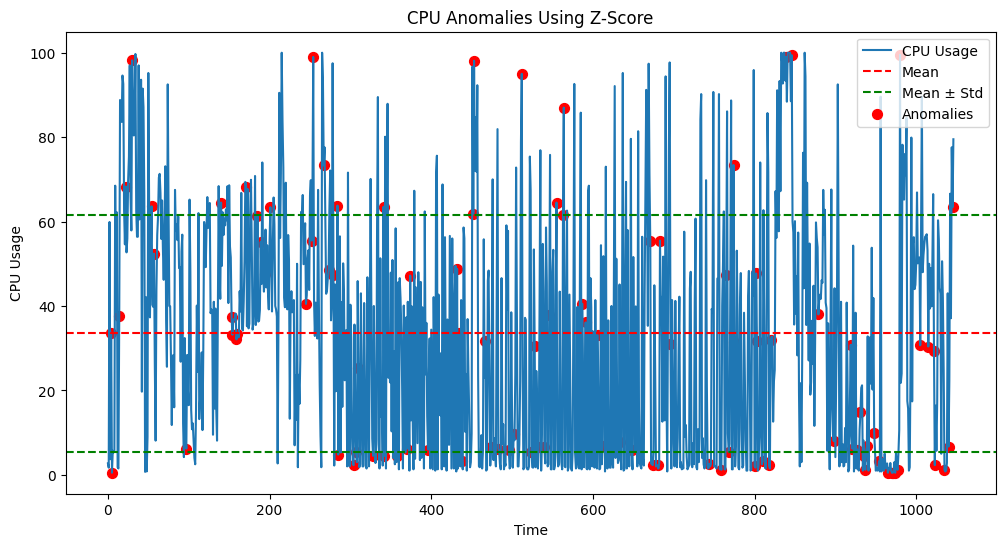

In [43]:
cpu_std = cpu_data.std()
cpu_mean = cpu_data.mean()

print(f"CPU Mean: {cpu_mean}")
print(f"CPU Std: {cpu_std}")
plt.figure(figsize=(12, 6))
plt.plot(cpu_data, label='CPU Usage')
plt.axhline(cpu_mean, color='r', linestyle='--', label='Mean')
plt.axhline(cpu_mean + cpu_std, color='g', linestyle='--', label='Mean ± Std')
plt.axhline(cpu_mean - cpu_std, color='g', linestyle='--')
plt.scatter(cpu_anomalies, cpu_data[cpu_anomalies], color='red', s=50, label='Anomalies')
plt.title('CPU Anomalies Using Z-Score')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

RAM Mean: 83.06867239732568
RAM Std: 4.151011942609996


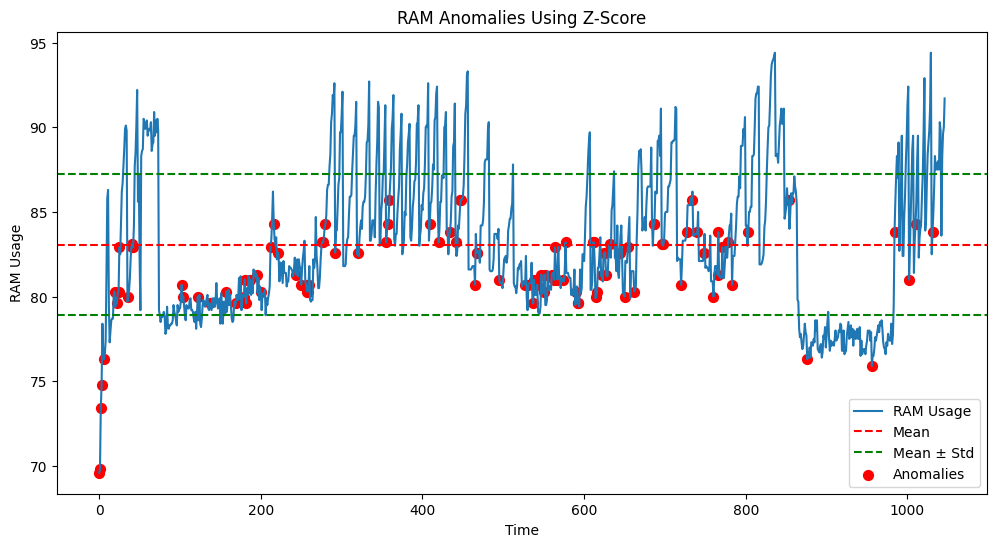

In [44]:
ram_std = ram_data.std()
ram_mean = ram_data.mean()

print(f"RAM Mean: {ram_mean}")
print(f"RAM Std: {ram_std}")

# Plot RAM data
plt.figure(figsize=(12, 6))
plt.plot(ram_data, label='RAM Usage')
plt.axhline(ram_mean, color='r', linestyle='--', label='Mean')
plt.axhline(ram_mean + ram_std, color='g', linestyle='--', label='Mean ± Std')
plt.axhline(ram_mean - ram_std, color='g', linestyle='--')
plt.scatter(ram_anomalies, ram_data[ram_anomalies], color='red', s=50, label='Anomalies')
plt.title('RAM Anomalies Using Z-Score')
plt.xlabel('Time')
plt.ylabel('RAM Usage')
plt.legend()
plt.show()

## Isolation Forests

In [50]:
from sklearn.ensemble import IsolationForest

def isolation_forest_anomalies(data, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=100)
    clf.fit(data.reshape(-1, 1))
    anomalies = np.where(clf.predict(data.reshape(-1, 1)) == -1)[0]
    return anomalies

In [26]:
print(isolation_forest_anomalies(ram_data))
print(isolation_forest_anomalies(cpu_data))

[   0    1    2    3    5    6    7   47   55   56   59   64   68   70
   72  287  288  289  290  291  300  301  318  334  345  346  354  363
  364  374  384  393  394  395  407  415  416  417  418  429  440  453
  454  455  456  482  695  713  714  799  812  813  814  815  816  830
  831  832  833  834  835  836  843  844  845  846  847  870  876  877
  878  879  880  889  890  891  894  895  899  904  919  920  922  923
  924  942  944  945  946  947  948  956  957  958  959  971  972  973
 1000 1001 1021 1028 1029 1040 1046]
[   5   15   16   17   18   19   26   27   30   31   32   33   34   38
   41   43   44   46   50   71   74  191  212  215  216  217  254  265
  266  267  268  275  278  334  343  346  407  451  453  454  455  457
  482  505  511  512  522  535  547  564  577  585  616  627  637  647
  656  666  669  690  694  695  733  734  749  756  766  771  774  799
  807  816  828  831  833  834  835  836  837  838  839  840  841  842
  843  844  845  846  860  862  863  903

In [27]:
process = []
with open('data.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        process.append(data['processes'])

In [51]:
cpu_anomalies = isolation_forest_anomalies(cpu_data)
ram_anomalies = isolation_forest_anomalies(ram_data)

reported_processes_ram = set()
reported_processes_cpu = set()

def check_and_report_anomaly(index, anomaly_type, reported_set):
    x = []
    process_keys = list(process[index].keys())
    for j in process_keys:
        if anomaly_type == 'RAM':
            x.append(process[index][j]['memory_percent'])
        elif anomaly_type == 'CPU':
            x.append(process[index][j]['cpu_percent'])
    max_index = np.argmax(np.array(x))
    max_process_key = process_keys[max_index]
   
    if max_process_key not in reported_set:
        print(f"{anomaly_type} Anomaly: {process[index][max_process_key]}")
        reported_set.add(max_process_key)

for i in ram_anomalies:
    check_and_report_anomaly(i, 'RAM', reported_processes_ram)

for i in cpu_anomalies:
    check_and_report_anomaly(i, 'CPU', reported_processes_cpu)

RAM Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 6.9, 'memory_percent': 19.117752697582418, 'name': 'node', 'status': 'sleeping'}
RAM Anomaly: {'pid': 947, 'create_time': 1719986666.42, 'cpu_percent': 123.0, 'memory_percent': 20.74100679391128, 'name': 'node', 'status': 'sleeping'}
CPU Anomaly: {'pid': 947, 'create_time': 1719986666.42, 'cpu_percent': 63.6, 'memory_percent': 21.20752540760938, 'name': 'node', 'status': 'sleeping'}
CPU Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 194.2, 'memory_percent': 20.209634909473532, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 1150, 'create_time': 1719986702.79, 'cpu_percent': 63.8, 'memory_percent': 8.61111813716315, 'name': 'node', 'status': 'sleeping'}
CPU Anomaly: {'pid': 16136, 'create_time': 1719990141.1, 'cpu_percent': 88.0, 'memory_percent': 1.9121091477511294, 'name': 'wakatime-cli-linux-amd64', 'status': 'sleeping'}
CPU Anomaly: {'pid': 20568, 'create_time': 1719991110.37, 'cpu

CPU Mean: 33.487010506208215
CPU Std: 28.082876109908582


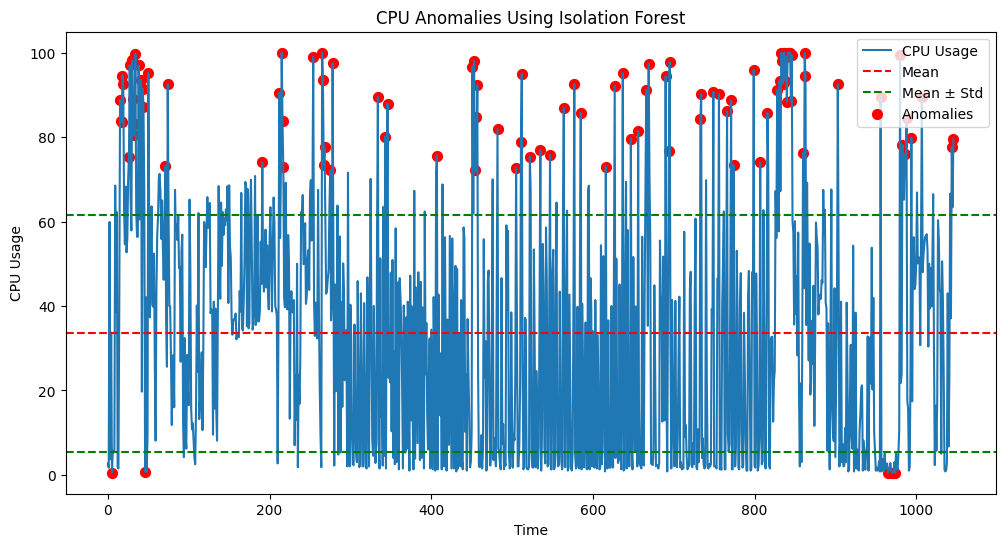

In [52]:
cpu_data = np.array(cpu_data)
cpu_std = cpu_data.std()
cpu_mean = cpu_data.mean()
cpu_anomalies = isolation_forest_anomalies(cpu_data)

print(f"CPU Mean: {cpu_mean}")
print(f"CPU Std: {cpu_std}")

plt.figure(figsize=(12, 6))
plt.plot(cpu_data, label='CPU Usage')
plt.axhline(cpu_mean, color='r', linestyle='--', label='Mean')
plt.axhline(cpu_mean + cpu_std, color='g', linestyle='--', label='Mean ± Std')
plt.axhline(cpu_mean - cpu_std, color='g', linestyle='--')
plt.scatter(cpu_anomalies, cpu_data[cpu_anomalies], color='red', s=50, label='Anomalies')
plt.title('CPU Anomalies Using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

RAM Mean: 83.06867239732568
RAM Std: 4.151011942609996


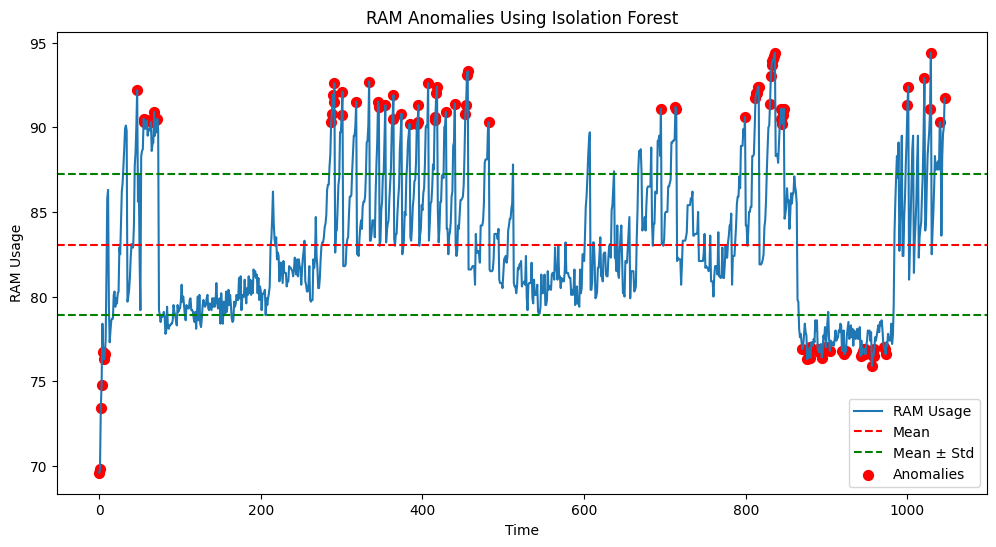

In [53]:
ram_data = np.array(ram_data)
ram_std = ram_data.std()
ram_mean = ram_data.mean()
ram_anomalies = isolation_forest_anomalies(ram_data)

print(f"RAM Mean: {ram_mean}")
print(f"RAM Std: {ram_std}")

plt.figure(figsize=(12, 6))
plt.plot(ram_data, label='RAM Usage')
plt.axhline(ram_mean, color='r', linestyle='--', label='Mean')
plt.axhline(ram_mean + ram_std, color='g', linestyle='--', label='Mean ± Std')
plt.axhline(ram_mean - ram_std, color='g', linestyle='--')
plt.scatter(ram_anomalies, ram_data[ram_anomalies], color='red', s=50, label='Anomalies')
plt.title('RAM Anomalies Using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('RAM Usage')
plt.legend()
plt.show()

# Local Outlier Factor

In [39]:
def lof_anomalies(data, contamination=0.1):
    lof = LocalOutlierFactor(n_neighbors=10, contamination=contamination)
    y_pred = lof.fit_predict(data.reshape(-1, 1))
    anomalies = np.where(y_pred == -1)[0]
    return anomalies

In [40]:
cpu_anomalies = lof_anomalies(cpu_data)
ram_anomalies = lof_anomalies(ram_data)

reported_processes_ram = set()
reported_processes_cpu = set()

def check_and_report_anomaly(index, anomaly_type, reported_set):
    x = []
    process_keys = list(process[index].keys())
    for j in process_keys:
        if anomaly_type == 'RAM':
            x.append(process[index][j]['memory_percent'])
        elif anomaly_type == 'CPU':
            x.append(process[index][j]['cpu_percent'])
    max_index = np.argmax(np.array(x))
    max_process_key = process_keys[max_index]
   
    if max_process_key not in reported_set:
        print(f"{anomaly_type} Anomaly: {process[index][max_process_key]}")
        reported_set.add(max_process_key)

# Report anomalies
for i in ram_anomalies:
    check_and_report_anomaly(i, 'RAM', reported_processes_ram)

for i in cpu_anomalies:
    check_and_report_anomaly(i, 'CPU', reported_processes_cpu)


RAM Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 6.9, 'memory_percent': 19.117752697582418, 'name': 'node', 'status': 'sleeping'}
RAM Anomaly: {'pid': 947, 'create_time': 1719986666.42, 'cpu_percent': 123.0, 'memory_percent': 20.74100679391128, 'name': 'node', 'status': 'sleeping'}
CPU Anomaly: {'pid': 947, 'create_time': 1719986666.42, 'cpu_percent': 54.2, 'memory_percent': 23.50106486844701, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 1150, 'create_time': 1719986702.79, 'cpu_percent': 17.1, 'memory_percent': 9.01440228251137, 'name': 'node', 'status': 'sleeping'}
CPU Anomaly: {'pid': 1409, 'create_time': 1719986734.85, 'cpu_percent': 174.5, 'memory_percent': 21.61809416371151, 'name': 'node', 'status': 'running'}
CPU Anomaly: {'pid': 3674, 'create_time': 1719987194.75, 'cpu_percent': 3.5, 'memory_percent': 1.437294171805521, 'name': 'node', 'status': 'sleeping'}
CPU Anomaly: {'pid': 868, 'create_time': 1719986660.68, 'cpu_percent': 3.2, 'memory_pe

CPU Mean: 33.487010506208215
CPU Std: 28.082876109908582


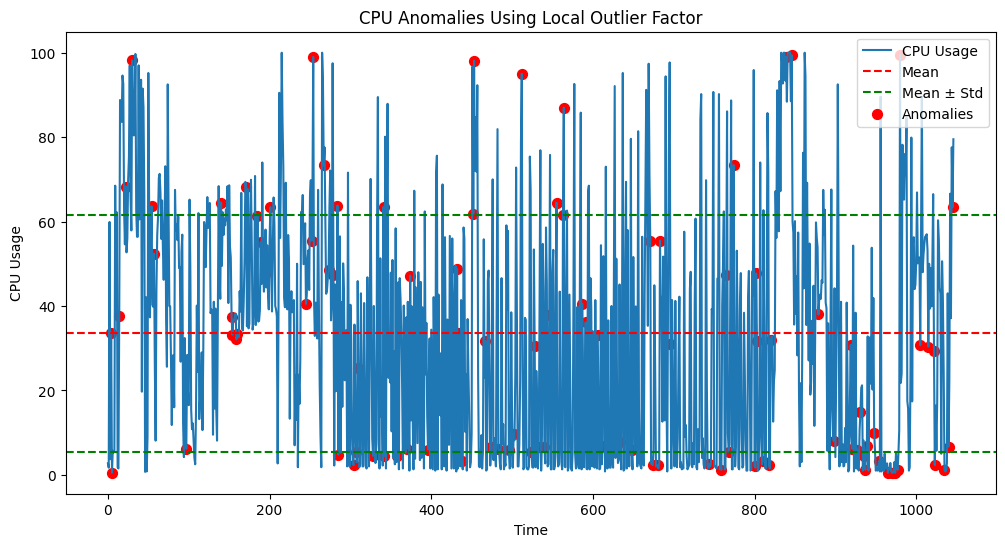

In [46]:
cpu_std = cpu_data.std()
cpu_mean = cpu_data.mean()
print(f"CPU Mean: {cpu_mean}")
print(f"CPU Std: {cpu_std}")
plt.figure(figsize=(12, 6))
plt.plot(cpu_data, label='CPU Usage')
plt.axhline(cpu_mean, color='r', linestyle='--', label='Mean')
plt.axhline(cpu_mean + cpu_std, color='g', linestyle='--', label='Mean ± Std')
plt.axhline(cpu_mean - cpu_std, color='g', linestyle='--')
plt.scatter(cpu_anomalies, cpu_data[cpu_anomalies], color='red', s=50, label='Anomalies')
plt.title('CPU Anomalies Using Local Outlier Factor')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()



RAM Mean: 83.06867239732568
RAM Std: 4.151011942609996


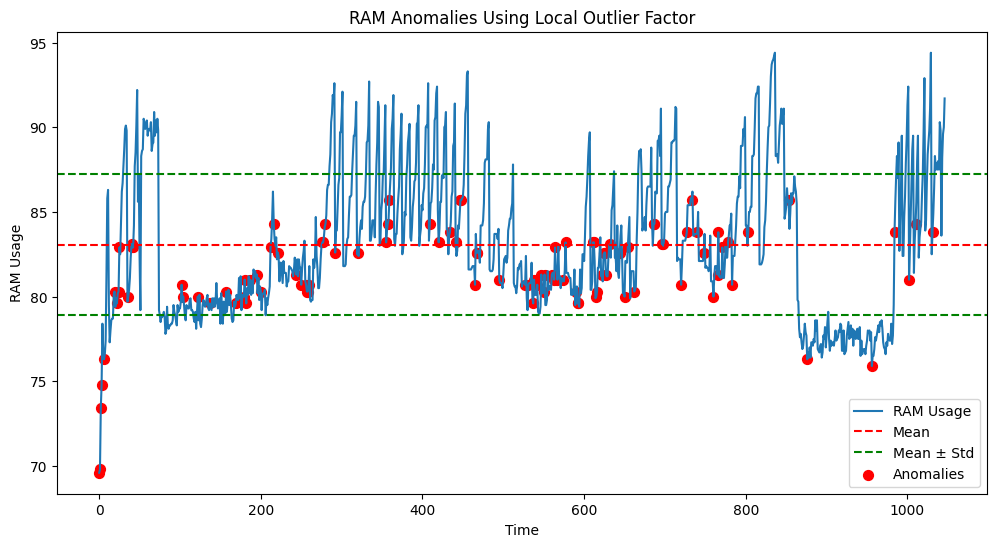

In [47]:
ram_std = ram_data.std()
ram_mean = ram_data.mean()
print(f"RAM Mean: {ram_mean}")
print(f"RAM Std: {ram_std}")
plt.figure(figsize=(12, 6))
plt.plot(ram_data, label='RAM Usage')
plt.axhline(ram_mean, color='r', linestyle='--', label='Mean')
plt.axhline(ram_mean + ram_std, color='g', linestyle='--', label='Mean ± Std')
plt.axhline(ram_mean - ram_std, color='g', linestyle='--')
plt.scatter(ram_anomalies, ram_data[ram_anomalies], color='red', s=50, label='Anomalies')
plt.title('RAM Anomalies Using Local Outlier Factor')
plt.xlabel('Time')
plt.ylabel('RAM Usage')
plt.legend()
plt.show()